# CV Exercise 1 – OpenCV

OpenCV is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in commercial products.

On Google Colab and Anaconda OpenCV is pre-installed. On other platforms, you may install its Python bindings with `pip install opencv-python`. OpenCV uses the following import:

In [1]:
import cv2

**Questions: (reading images)**
1. Using the `cv2.imread(...)` function, save the attached `hello_kitty.jpg` image in a variable `img`.
2. What is the type of the variable `img`? (`type(...)`) What is its shape? (`.shape`) What data types does it contain? (`.dtype`)


In [2]:
#1.
img = cv2.imread('hello_kitty.jpg')

In [3]:
#2.
type(img)

numpy.ndarray

img is a numpy array.

In [4]:
img.shape

(600, 900, 3)

the shape is (600,900,3).

In [5]:
img.dtype

dtype('uint8')

It contains integers.

## Channels, Image Formats, and using images as arrays

By default, OpenCV uses HWC (height, width, chanels) format for images. While it may seem strange that the height is first, it's because OpenCV treats images as "Rows" and "Columns" of an image. The "height" of an image is the number of rows!

You can see each pixel is represented by 3 values (uint8 means they are between 0 and 255)

Color images consist of "channels" - each color we can render is some combination of red, green, and blue (OR, in the case of a grayscale image, gray).

By default, color images are opened by OpenCV as BGR, meaning the values for a given pixel are ordered "blue, green, red". However, matplotlib assumes images are in RGB ("red, green, blue") format.

**Questions (showing, manipulating, and saving images):**
3. Use the `cv2.cvtColor(..., cv2.COLOR_BGR2RGB)` function to change which color system our image is in. Save the modified array in a new variable `img_rgb`.
4. Use matplotlib's `imshow(...)` function to display the image in `img_rgb`.
5. Try using `imshow(...)` to display `img` directly. What do you see, and why?
6. Use `cv2.cvtColor(...)` with parameter `cv2.COLOR_BGR2GRAY` to draw a grayscale kitty. Note: You must pass `cmap='gray'` to `imshow(...)` so that matplotlib knows to render the image in shades of gray.
7. Create and show a new image that uses the grayscale kitty in the red and blue channels, and zeros in the green channel. Hint: You can create it directly as a NumPy array, using the image from question 6, `np.zeros(..., dtype=np.uint8)`, and `np.stack(...)`.
8. Using `cv2.resize(...)`, make and show our kitty with width stretched to be x4 wider.
9. Using `cv2.imwrite(...)`, save our stretched kitty from question 8 to a new file `output_kitty.png`.

In [6]:
#3.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

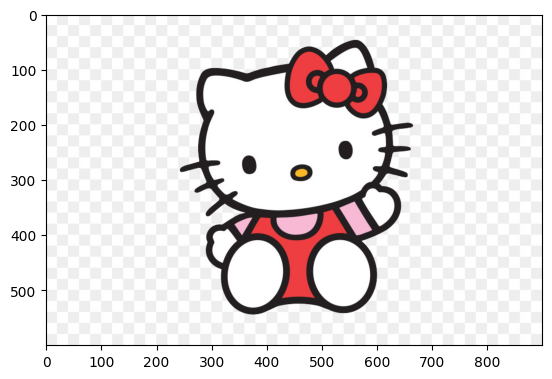

In [7]:
#4.
import matplotlib.pyplot as plt
plt.imshow(img_rgb)

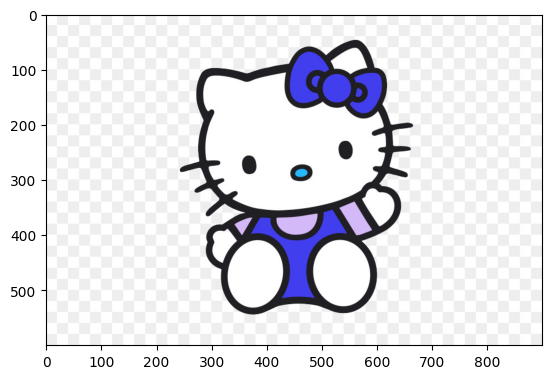

In [8]:
#5.
plt.imshow(img)

We see the same image as before but with another scale : BGR instead of RGB so we see blue instead of red.

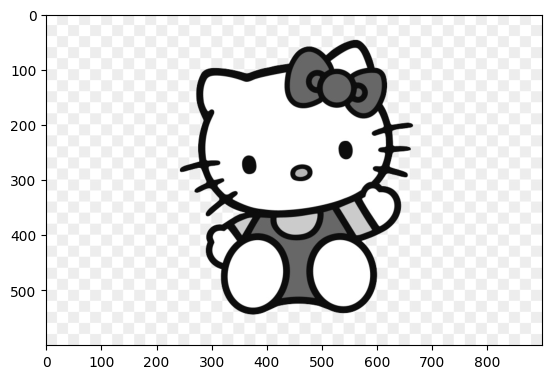

In [9]:
#6.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238]], dtype=uint8)
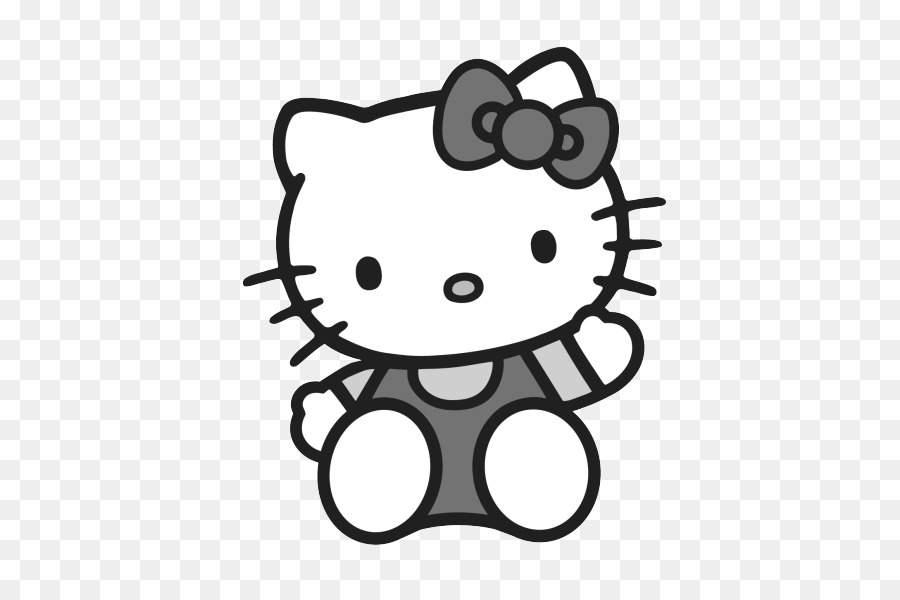

In [10]:
img_gray

In [11]:
#7.
import numpy as np
img_rb = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), dtype = np.uint8)

In [12]:
img_rb[:,:,0] = img_gray
img_rb[:,:,1] = np.zeros_like(img_rb[:,:,0])
img_rb[:,:,2] = img_gray

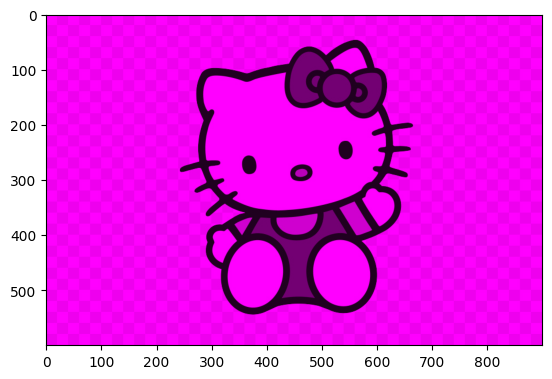

In [13]:
plt.imshow(img_rb)

In [14]:
#8.
width4 = cv2.resize(img_rb,(900*4,600))

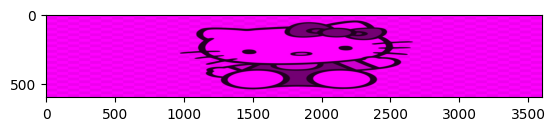

In [15]:
plt.imshow(width4)

In [16]:
#9.
cv2.imwrite('output_kitty.png', width4)

True

**Questions: (contrast adjustment)**
10. Using the code provided for question 10, plot the attached `dog.jpg` image using gamma correction with the following gamma values: 0.125, 0.5, 1, 2, 4, 16. Make sure you converted the image to RGB format first!
11. Load the attached `hist_1.jpg` image, passing the flag `cv2.IMREAD_GRAYSCALE` to `cv2.imread(...)` so that it is loaded as a grayscale image, and show the image.
12. Apply histogram equalization to the image from question 11 with `cv2.equalizeHist(...)` and show the resulting image.
13. Using `plt.hist(..., bins=...)`, plot the intensity histograms of the images from questions 11 and 12. Note: Make sure you convert the images from a 2-d array to a vector using `.flatten()`.
14. Apply CLAHE to the image from question 11 using `cv2.createCLAHE(...).apply(...)`. Show the resulting image and plot its intensity histogram. Recommended parameters for CLAHE: `clipLimit=2.0, tileGridSize=(8, 8)`

In [17]:
# CODE FOR QUESTION 10
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [18]:
img_dog = cv2.imread('dog.jpg')
img_dog = cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB)

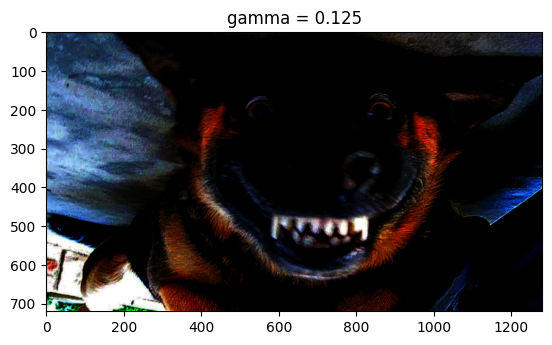

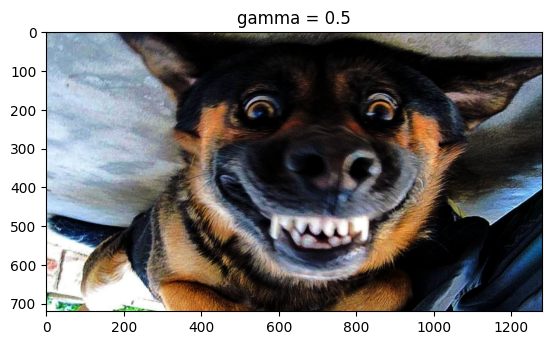

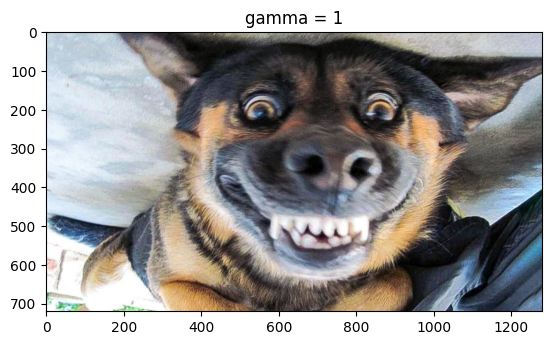

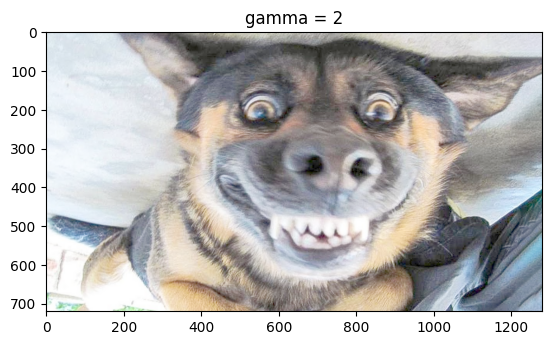

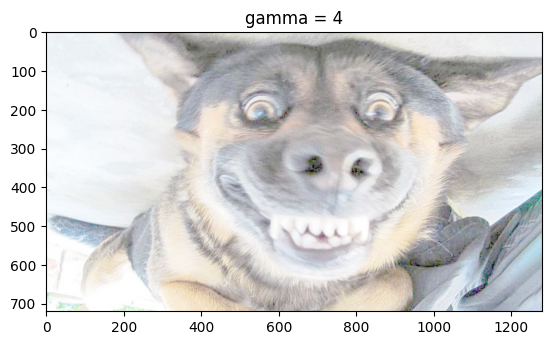

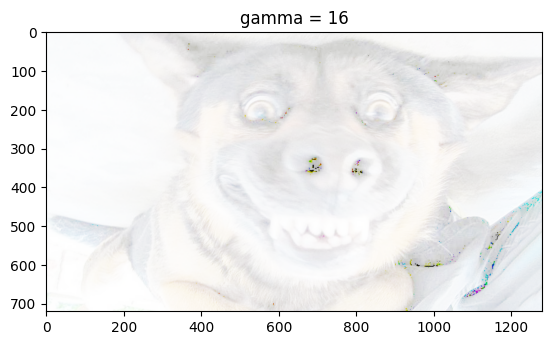

In [19]:
for gammas in [0.125, 0.5, 1, 2, 4, 16]:
  plt.imshow(adjust_gamma(img_dog, gammas))
  plt.title(f'gamma = {gammas}')
  plt.show()

array([[207, 207, 207, ..., 177, 177, 177],
       [207, 207, 207, ..., 177, 177, 178],
       [207, 208, 208, ..., 177, 178, 178],
       ...,
       [  2,   2,   2, ...,  57,  56,  57],
       [  2,   2,   2, ...,  58,  57,  58],
       [  2,   2,   2, ...,  56,  54,  55]], dtype=uint8)
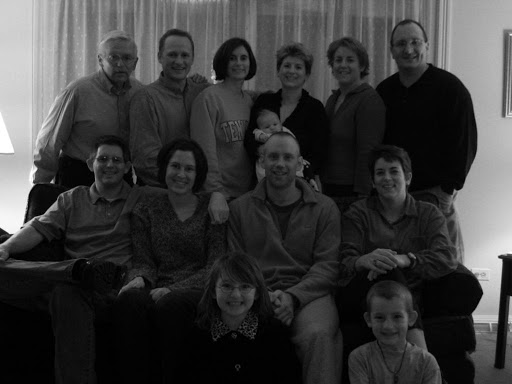

In [20]:
#11.
hist = cv2.imread('hist_1.jpg', cv2.IMREAD_GRAYSCALE)
hist

array([[246, 246, 246, ..., 234, 234, 234],
       [246, 246, 246, ..., 234, 234, 235],
       [246, 247, 247, ..., 234, 235, 235],
       ...,
       [ 16,  16,  16, ..., 167, 165, 167],
       [ 16,  16,  16, ..., 168, 167, 168],
       [ 16,  16,  16, ..., 165, 162, 164]], dtype=uint8)
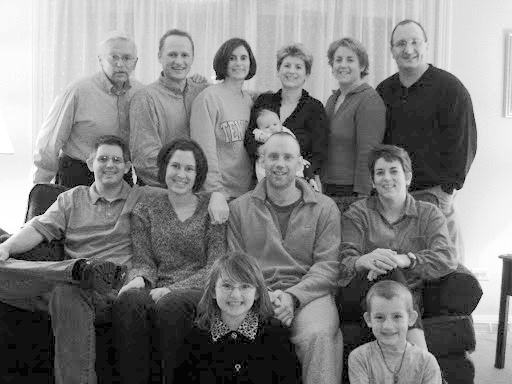

In [21]:
#12.
equal_hist = cv2.equalizeHist(hist)
equal_hist

(array([ 3745.,  9692.,  4202., 11219.,  5591.,  3185.,  2858.,  4581.,
         2218.,  2443.,  5364.,  2814.,  2492.,  2330.,  4173.,  1937.,
         1934.,  1976.,  3669.,  1784.,  1841.,  3531.,  1741.,  1748.,
         1761.,  3559.,  1935.,  1823.,  1879.,  3599.,  1855.,  1828.,
         3610.,  1731.,  1666.,  1559.,  2922.,  1346.,  1381.,  1349.,
         2431.,  1144.,  1103.,  2105.,  1048.,  1015.,   987.,  1698.,
          874.,   829.,  1620.,   787.,   650.,   691.,  1309.,   699.,
          684.,   714.,  1510.,   701.,   710.,  1260.,   638.,   580.,
          530.,  1058.,   490.,   494.,   474.,   945.,   496.,   489.,
         1018.,   537.,   545.,   558.,  1075.,   529.,   498.,   514.,
         1064.,   500.,   429.,   936.,   461.,   390.,   363.,   787.,
          397.,   425.,   756.,   379.,   381.,   342.,   652.,   280.,
          263.,   266.,   514.,   204.,   203.,   426.,   170.,   188.,
          171.,   358.,   209.,   193.,   166.,   337.,   161., 

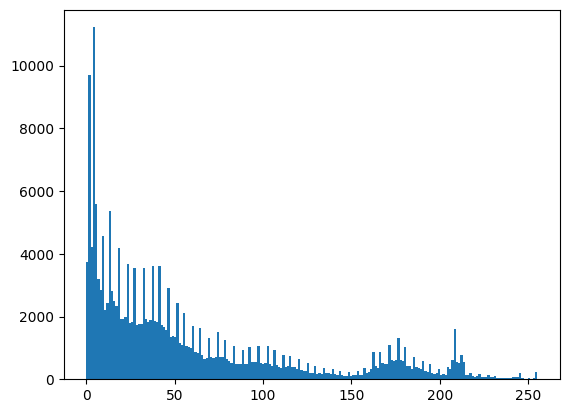

In [22]:
#13.
plt.hist(hist.flatten(), bins = 200)

(array([ 768.,    0.,    0., 2977.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 9692.,    0.,    0.,    0.,    0., 4202.,
           0.,    0.,    0., 3918.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 7301.,    0.,    0.,    0.,    0., 5591.,    0.,
           0., 3185.,    0.,    0., 2858.,    0.,    0., 2336.,    0.,
        2245.,    0., 2218.,    0.,    0., 2443.,    0., 2512.,    0.,
           0., 2852.,    0.,    0., 2814.,    0.,    0., 2492.,    0.,
        2330.,    0., 2174.,    0., 1999.,    0., 1937.,    0., 1934.,
           0., 1976.,    0., 1783.,    0., 1886.,    0., 1784., 1841.,
           0.,    0., 1753., 1778.,    0., 1741., 1748.,    0.,    0.,
        1761., 1746.,    0., 1813.,    0., 1935.,    0., 1823.,    0.,
        1879.,    0., 1823., 1776.,    0.,    0., 1855., 1828.,    0.,
        1811.,    0., 1799.,    0., 1731., 1666.,    0., 1559., 1526.,
           0., 1396.,    0., 1346., 1381., 1349., 1259.,    0., 1172.,
      

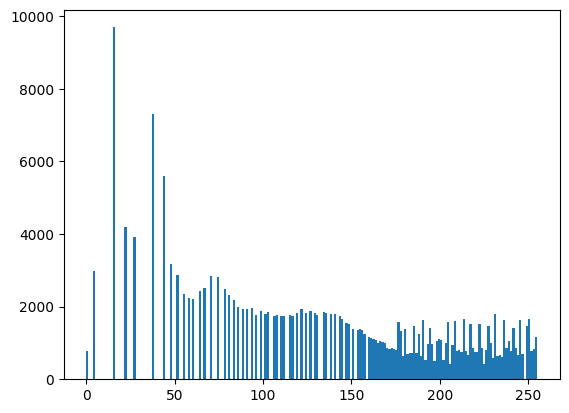

In [23]:
plt.hist(equal_hist.flatten(), bins = 200)

In [24]:
#14.
clahe_hist = cv2.createCLAHE(clipLimit = 2,tileGridSize = (8,8)).apply(hist)

array([[218, 218, 218, ..., 191, 191, 191],
       [218, 218, 218, ..., 191, 191, 193],
       [218, 221, 221, ..., 191, 193, 193],
       ...,
       [  9,   9,   9, ...,  78,  76,  78],
       [  9,   9,   9, ...,  81,  78,  81],
       [  9,   9,   9, ...,  76,  71,  73]], dtype=uint8)
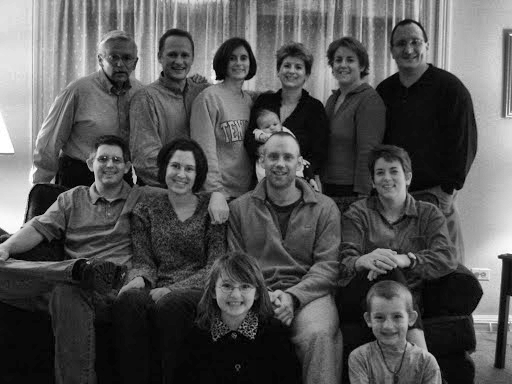

In [25]:
clahe_hist

(array([ 480.,  534.,  276., 3436.,  831., 5157., 6618., 6610., 3431.,
        3491., 2612., 4381., 1476., 1229., 2337.,  939., 1067.,  967.,
        1923.,  952., 1085.,  929., 2221., 1075., 1002., 2333., 1046.,
        1338., 1245., 2575., 1319., 1304., 1275., 2387., 1174., 1096.,
        1167., 2259., 1010., 1095., 1985., 1027.,  848., 1008., 1858.,
         937.,  864.,  950., 1814.,  996.,  921., 2046.,  902., 1008.,
         967., 1957.,  930.,  975., 1015., 1984., 1070.,  902., 1964.,
         999.,  996.,  984., 2040.,  973., 1004.,  923., 2002.,  955.,
         993.,  971., 1871.,  899.,  969., 1890.,  851.,  934.,  899.,
        1688.,  858.,  834.,  841., 1613.,  854.,  775., 1580.,  747.,
         778.,  780., 1415.,  819.,  690.,  740., 1335.,  675.,  626.,
         630., 1350.,  639.,  542., 1223.,  578.,  594.,  579., 1069.,
         535.,  554.,  535., 1090.,  569.,  565., 1090.,  543.,  578.,
         546., 1117.,  561.,  597.,  590., 1233.,  626.,  556., 1165.,
      

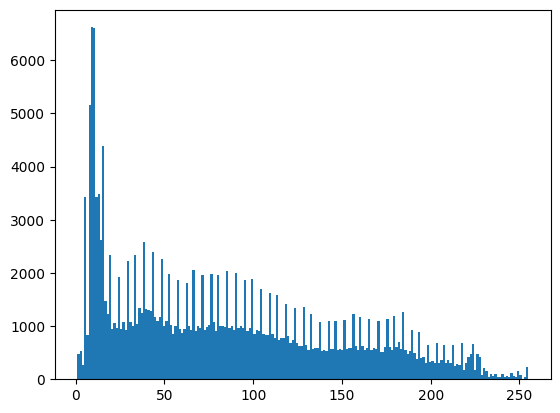

In [26]:
plt.hist(clahe_hist.flatten(), bins = 200)

**Questions: (binary thresholding)**

15. Load the attached `mountains.jpg` image and plot it as a grayscale image.
16. Using `cv2.threshold(..., cv2.THRESH_BINARY)`, convert the image to a B&W image with binary thresholding using threshold value 100, and plot the resulting B&W image.

In [27]:
#15.
mount = cv2.imread('mountains.jpg', cv2.IMREAD_GRAYSCALE)

array([[120, 120, 120, ..., 121, 120, 119],
       [120, 120, 120, ..., 123, 122, 121],
       [120, 120, 120, ..., 126, 125, 124],
       ...,
       [ 33,  57,  57, ...,  15,  13,  11],
       [ 36,  41,  54, ...,  16,  13,  10],
       [ 21,  15,  44, ...,  16,  13,   9]], dtype=uint8)
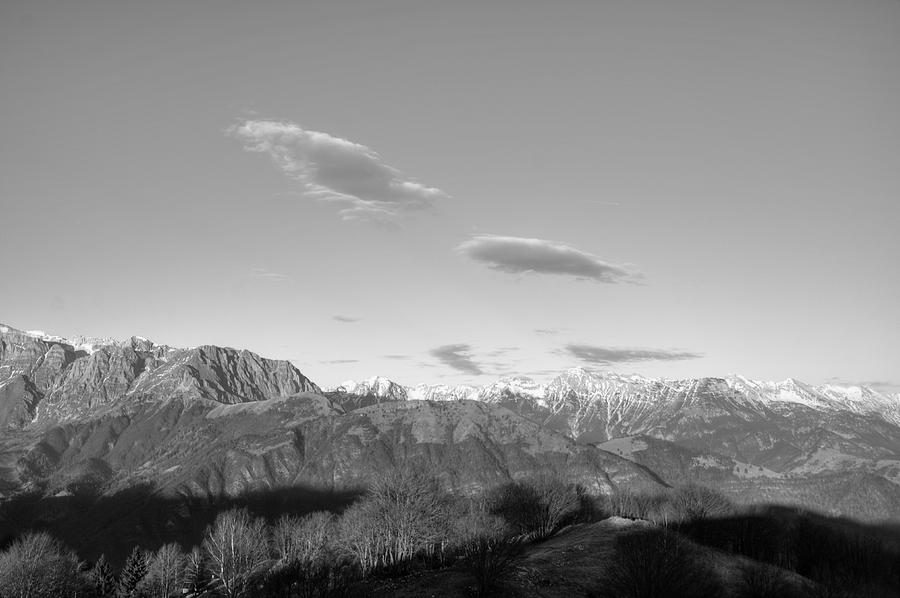

In [28]:
mount

In [29]:
bw_mount = cv2.threshold(mount,100, 255,cv2.THRESH_BINARY)[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
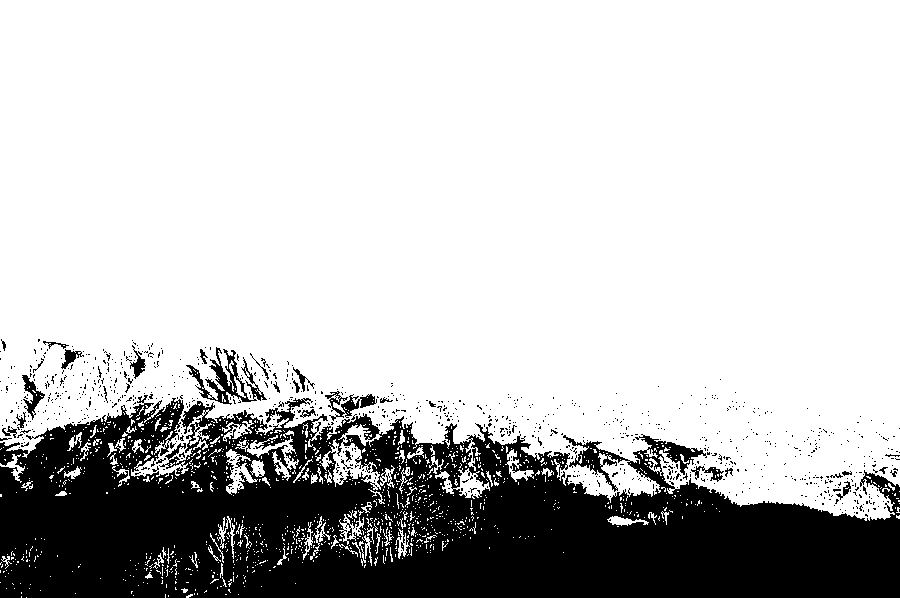

In [30]:
bw_mount